## iris 데이터 특성데이터를 이용해서 군집분류를 수행하고 pairplot 그리고 실제값과 정확도를 확인하시오

In [1]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data = pd.DataFrame(iris['data'],columns=['sl','sw','pl','pw'])

target = pd.DataFrame(iris['target'])

In [4]:
data

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
data

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
k = KMeans(n_clusters=3)

km = k.fit(data)

result_data = data.copy()

In [8]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
(km.labels_ == iris['target']).mean()

0.24

In [11]:
mylist = []
for n in range(1,15):
    model = KMeans( n_clusters=n)
    km = model.fit( data )
    mylist.append( km.inertia_ )

C:\Users\medici\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


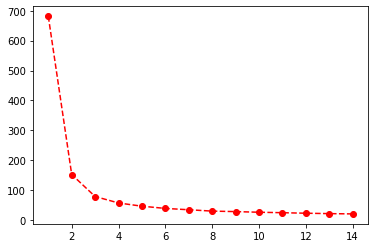

In [12]:
plt.plot( range(1,15) ,mylist , 'ro--')
plt.show()

### =======================

In [13]:
result_data['origin'] = iris['target']

In [14]:
result_data['predict'] = km.labels_

In [15]:
result_data

,sl,sw,pl,pw,origin,predict
0,5.1,3.5,1.4,0.2,0,6
1,4.9,3.0,1.4,0.2,0,10
2,4.7,3.2,1.3,0.2,0,10
3,4.6,3.1,1.5,0.2,0,10
4,5.0,3.6,1.4,0.2,0,6
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,12
146,6.3,2.5,5.0,1.9,2,9
147,6.5,3.0,5.2,2.0,2,12
148,6.2,3.4,5.4,2.3,2,12


C:\Users\medici\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


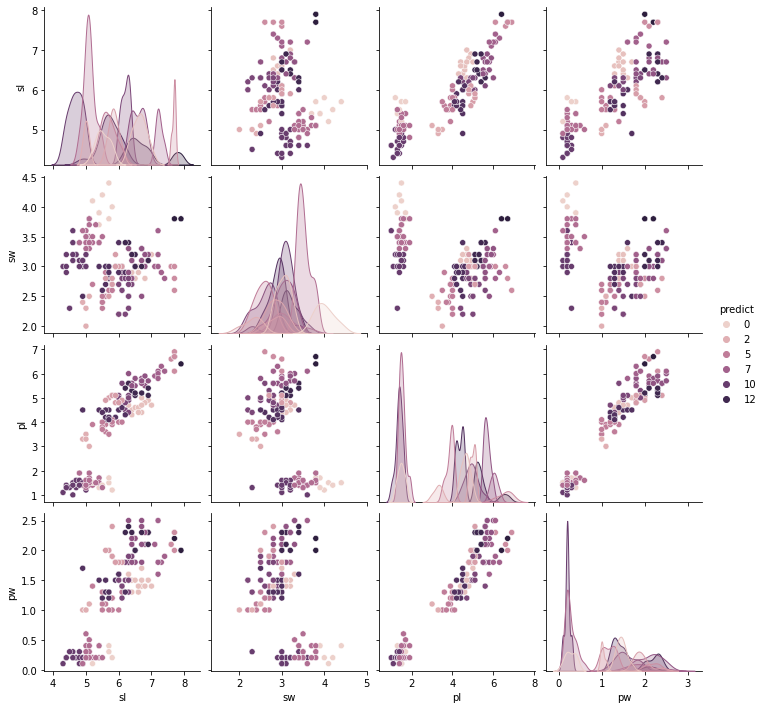

In [16]:
import seaborn as sns

sns.pairplot(result_data.iloc[:,[0,1,2,3,5]],hue='predict')

plt.show()

In [17]:
result_data['score'] = result_data['origin'] - result_data['predict']

In [18]:
score = (len(data) - result_data.query('score != 0').count() ) / len(data)

In [19]:
score['score']

0.13333333333333333